In [51]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing  # 정규화
from sklearn.linear_model import LinearRegression
# 1. 타이타닉 데이터를 회귀분석해서 종속변수를 예측하는데 종속변수를 나이에 두고 회귀분석하자

# 1단계) 데이터로드 -> 데이터프레임
df = sns.load_dataset('titanic')
# pd.set_option('display.max_columns', 15)

# 2단계) 결손값 확인 제거하거나 치환환다.
# 2-1 데이터 프레임의 자료형을 확인하고 10살 이하 여성은 child_woman 컬럼으로 대입후 정수 타입으로 지정
mask = (df.age < 10) | (df.sex == 'female')
df['child_women'] = mask.astype(int)
df['child_women']

# 2-2 결측(NaN) 컬럼을 확인하고 deck(결측값이 많음), embark_town(중복값이 존재) 삭제하자
rdf = df.drop(['deck', 'embark_town'], axis=1)

# 2-3 age에 나이가 없는 행은 삭제하자  dropna(대상 subset['컬럼명]', 조건 how)
# 데이터가 한개라도 없으면 drop해라  (how = 'any')
# 데이터가 모두 없으면 drop해라  (how = 'all')
rdf = rdf.dropna(subset=['age'], how='any')

# 2-4 embarked열의 NaN값을 승선 도시 중 가장 많이 출현한 값(idxmax())으로 치환 fillna(채울값, inplace)하자
most_freg = rdf['embarked'].value_counts().idxmax()  # embarked 컬럼의 데이터를 개수로 나타내 가장 큰 값으로 출력
rdf['embarked'].fillna(most_freg, inplace=True)

# 3단계) 범주형 데이터를 숫자형으로 변환하기  
# 분석에 필요한 속성 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked', 'child_women']]

# 범주형 데이터 숫자형 변환(onehot).  pd.get_dummies().  sex, embarked
# 범주형 데이터 숫자 변환 -> onehot 병합 -> 원래의 컬럼은 삭제한다.
gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, gender], axis=1)

embarked = pd.get_dummies(ndf['embarked'])
ndf = pd.concat([ndf, embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

# 4단계) 정규화 (독립변수(데이터)와 종속변수(결과.라벨)를 지정 -> 독립변수 정규화)
# 라벨, 종속변수 | 데이터, 독립변수
X = ndf[['survived', 'pclass', 'sibsp', 'parch', 'child_women', 'female', 'male', 'C', 'Q', 'S']]  # 독립변수
y = ndf['age']   # 종속변수

# 독립변수 정규화
# normalization : 서로 다른 범위(분포)를 갖는 값을 같은 범위 나이 1~100, 수입 0달러에서 20000달러
# standarization : 오차 범위가 너무 큰 아웃라이어들을 배제해주는 작업입니다.
X = preprocessing.StandardScaler().fit(X).transform(X)

# 5단계) 다중회귀분석 모형 - 
lr = LinearRegression()  # 모형 객체, 모델 선택

# 학습
lr.fit(X,y)

y_hat = lr.predict(X)
print(y_hat)

# 6단계) 시각화

[27.08001141 32.26751141 21.92376141 33.70501141 29.54876141 43.79876141
  0.64251141 21.86126141 25.14251141 19.42376141 36.17376141 29.54876141
 26.89251141 25.95501141 29.04876141  2.33001141 23.48626141 36.67376141
 32.64251141 26.08001141 39.76751141 18.48626141 19.26751141 36.29876141
 42.39251141 36.67376141 39.89251141 41.33001141 29.54876141 21.01751141
 18.01751141 23.48626141 30.61126141 25.14251141 26.08001141 23.48626141
 -1.82623859 29.54876141 32.26751141 26.58001141 42.39251141 29.04876141
 28.14251141 26.51751141 17.08001141 28.14251141 36.17376141 41.33001141
  0.61126141 29.04876141 29.54876141 11.95501141 24.58001141 36.67376141
 13.51751141 36.67376141 25.64251141 25.51751141 29.54876141 11.14251141
 21.92376141 29.54876141 25.51751141 43.79876141 29.04876141 14.51751141
 26.95501141 28.67376141 29.54876141 29.54876141 29.54876141 41.33001141
 26.98626141 29.54876141 42.39251141 38.39251141 29.01751141 34.20501141
 25.95501141 43.76751141 29.54876141 24.58001141 29

In [53]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing  # 정규화
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

# 2. 타이타닉 데이를  나이의  결측값을 중간값으로 지정하고  생존률을 종속변수로 지정한 후  
#    K-NN 모델의 정확도를 확인 해보자  
#[1단계]  데이터 로드  -> 데이터 프레임  
df = sns.load_dataset('titanic')
pd.set_option('display.max_columns',15)

#[2단계 ] 결손값 확인 제거하거나 치환한다.  
#2-1.  데이터 프레임의 자료형을 확인하자 
#2-2  결측(NaN) 컬럼을 확인하자.  
#2-3  deck, embark_town를 삭제하자
rdf  = df.drop(['deck', 'embark_town' ],axis =1)

#2-4 age의 결손값을 중간값으로 대처하자.  
rdf['age'].fillna(rdf['age'].median(), inplace = True)

#2-5 embarked열의 NaN 값을 승선 도시중 가장 많이 출현한 값 idxmax()으로 치환  fillna(채울값 ,inplace ) 하자.  
most_freg = rdf['embarked'].value_counts().idxmax()
rdf['embarked'].fillna(most_freg,inplace= True)

#[3단계] 범주형 데이터를 숫자형으로 변환하기   
# 분석에 필요한 속성 선택
ndf =rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]

#범주형 데이터 숫자형 변환 (onehot)  pd.get_dummies()   sex , embarked 
# 범주형 데이터 숫자 변환 ->  onehot 병합 ->  원래의 컬럼은 삭제한다.  
gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender],axis=1)
res = pd.get_dummies(ndf['embarked'],prefix='town')
ndf = pd.concat([ndf,res],axis=1)
ndf.drop(['sex', 'embarked'],axis =1, inplace = True)

# 4단계) 정규화 (독립변수(데이터)와 종속변수(결과.라벨)를 지정 -> 독립변수 정규화)
# 라벨, 종속변수 | 데이터, 독립변수
X = ndf[['pclass','sibsp','parch','age','female','male','town_C','town_Q','town_S']]  # 독립변수
y = ndf['survived']  #종속변수

# 독립변수 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 개수확인
print('train data 개수 :', X_train.shape)
print('test data 개수 :', X_test.shape)

# 5단계) 모델링
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 테스트 데이터에 대한 사망자와 생존자를 예측해보자
y_hat = knn.predict(X_test)

# 6단계) 모델 평가
knn_met = confusion_matrix(y_test, y_hat)
print(knn_met)

# 정확도 확인 : 정답률
accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

train data 개수 : (623, 9)
test data 개수 : (268, 9)
[[137  31]
 [ 32  68]]
0.7649253731343284


In [54]:
import numpy as np
# ex01) 평균이 30이고 표준편차가 5인 가우시안 정규분포를 따르는 모집을 백만개 구성해보자
avg = 30
std = 5
N = 10000000
res = np.random.randn(N) * std + avg
print(res)

[26.71827003 31.18753373 25.63338601 ... 24.40053436 24.74937476
 38.4642285 ]


In [55]:
import numpy as np
# ex02) 서울시 초등학생 백만명의 평균키가 150.2, 표준편차가 30인 모집단을 구성하시오
avg = 150.2
std = 30
N = 10000000
res = np.random.randn(N) * std + avg
print(res)

[174.31980194 179.11883796 133.94782147 ... 153.8429305  197.23766589
  82.01410503]


In [58]:
# ex03) ex02)의 모집단에서 100명을 표본으로 추출해서 100명의 평균키를 리스트 객체(my_list)에 입력하는 작업을 10000번 수행하자
# my_list에 있는 10000개 표본의 평균키를 입력하자
avg = 150.2
std = 30
N = 10000000
res = np.random.randn(N) * std + avg

my_list = []
for i in range(1,10001):
    result = np.random.choice(res, 100).mean()
    my_list.append(result)   # 평균값이 10000 입력된다

print(my_list)
print(len(my_list))

# 초등학교 100만명의 키 모집단에서 표본을 100개 추출해서 표본 평균을 10000개 모았다.

# 앞, 뒤 / 2  1/6

[152.02453423338795, 150.82207863664678, 149.41068419499092, 153.27349489621966, 151.6033788925297, 154.33259232006148, 153.1792199329174, 151.17394916465418, 150.96948777466713, 145.82298043322885, 147.4410957116792, 145.88432787418094, 150.58212121726666, 149.67695137398425, 151.88155583059108, 147.47452454616376, 151.56534943208945, 151.30057100083266, 146.63355020677483, 148.37724267743002, 153.83338684782456, 151.62507564741452, 150.49202558573143, 146.78431062181426, 149.9791596661738, 151.96193649108562, 153.55883191119466, 153.58892503415228, 146.1971853092123, 149.6846345860385, 155.56722160033846, 151.33532124237973, 154.1125873590202, 152.0566606181504, 150.71609424138603, 150.28535643047485, 150.55438576608879, 155.67369536392204, 151.40215447044136, 151.8794736629672, 146.36907062318346, 151.97398959728946, 152.41369117031144, 150.06634683784262, 149.5518413428612, 149.44992863861907, 149.3216656293484, 149.64226072615162, 149.77992304205608, 149.44500140251083, 149.098529

[0.00040381 0.00040427 0.00040473 ... 0.00061416 0.00061349 0.00061281]


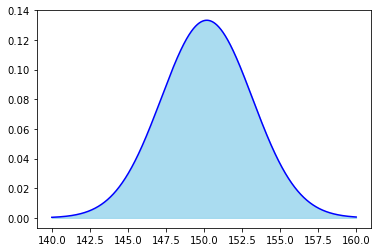

In [64]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# ex04) 조건1) ex02의 모집단에서 100명을 표본으로 추출해서 100명의 평균키를 리스트 객체(my_list)에 입력하는 작업을 10000번 수행하자
# my_list에 있는 10000개 표본의 평균키를 입력하자
# 조건2) 확률 밀도 함수 값 출력
# 조건3) 정규분포를 그려라
avg = 150.2
std = 30
N = 10000000
res = np.random.randn(N) * std + avg

my_list = []
for i in range(1,10001):
    result = np.random.choice(res, 100).mean()
    my_list.append(result)   # 평균값이 10000 입력된다

x = np.arange(140, 160, 0.001)   # 140 ~ 160 까지 0.001의 간격으로 숫자를 생성
y = norm.pdf(x, np.mean(my_list), np.std(my_list))
print(y)  # 초등학생 키의 표본 평균값들에 대한 확률 밀도 함수 값 출력

plt.plot(x, y, color = 'blue')

# 그래프의 아래영역을 색깔로 채워라
plt.fill_between(x, y, interpolate=True, color='skyblue', alpha=0.7)

In [69]:
# ex05) 동전을 10번 던져서 앞면이 2번 나올 확률을 출력하자 (동전을 10번 던지는 작업을 10000번 수행하자)
import random

coin = ['앞면', '뒷면']
cnt = 0

for k in range(1,10001):
    a = []
    for i in range(1,11):
        result = random.choice(coin)
        a.append(result)
        
    if a.count('앞면') == 2:
        cnt = cnt + 1
    
print(cnt/10000)   # 확률

0.043


In [77]:
# ex06) 주사위 2개를 동시에 던져서 두 주사위의 합이 10이 나오는 확률을 출력하시오(주사위 2개를 동시에 던지기 10000번 수행)
dice1 = list(range(1,7))
dice2 = list(range(1,7))
cnt = 0

for k in range(1,10001):
    result1 = random.choice(dice1)
    result2 = random.choice(dice2)
        
    if result1 + result2 == 10:
        cnt = cnt + 1
        
print(cnt/10000)

0.0793


In [79]:
# ex07) 주머니에서 임의의 공을 뽑았을 때 그 공이 파란색일 확률은 얼마인가(공을 뽑은 작업 10000번 수행)
box = ['red', 'blue', 'red', 'blue', 'blue']

cnt = 0

for k in range(1,10001):
    result1 = random.choice(box)
        
    if result1 == 'blue':
        cnt = cnt + 1
        
print(cnt/10000)

0.6057


In [97]:
from random import shuffle
# ex08) 파란공 70개와 빨간공 30게가 있는 주머니를 만들자
a = ['blue'] * 70
b = ['red'] * 30
box = a+b
print(len(box))   # 요소확인

# 무작위로 섞자
shuffle(box)

# box에서 공3개 추출했을 때 그 공 3개가 다 파란색일 확률은? 단 10000번 수행할 경우
cnt = 0

for k in range(1,10001):
    result1 = random.choice(box)
    result2 = random.choice(box)
    result3 = random.choice(box)
        
    if result1 == 'blue' and result2 == 'blue' and result3 == 'blue':
        cnt = cnt + 1
        
print(cnt/10000)

100
0.3528


### 복원추출법(sampling with replacement : SWR)
 - 추출된 것을 되돌려 넣고 추출하는 방법
 - 복원 추출법은 같은 표본이 중복해서 나올 수 있다.
 
### 비복원추출법(sampling without replacement : SWOR)
 - 추출된 것을 되돌려 넣지 않고 추출하는 방법
 - 비복원추출법으로 한번 추출된 것은 다시 추출되지 않는다

In [99]:
from random import shuffle
# ex09) 파란공 70개와 빨간공 30게가 있는 주머니를 만들자
a = ['blue'] * 70
b = ['red'] * 30
box = a+b
print(len(box))   # 요소확인

# 무작위로 섞자
shuffle(box)

# box에서 공3개 추출했을 때 그 공 3개가 다 파란색일 확률은? 단 10000번 수행할 경우
cnt = 0

for k in range(1,10001):
    result = random.sample(box, 3)   # box에서 공 3개를 추출했을 때
    
    if result.count('blue') == 3:
        cnt = cnt + 1
        
print(cnt/10000)

# random 패키지의 sample 함수는 비복원 추출
# 넘파이의 랜덤 초이스는 복원 추출

100
0.3402


In [108]:
import random
# ex10) 복원 추출로 수행하시오
blue= ['blue'] * 70
red = ['red'] * 30
box = blue + red

cnt = 0

for i in range(1,10001):
    res = []
    for k in range(3):  # 3회 뽑음
        res.append(random.choice(box))   # a 안에 집어넣음
    
    if res.count('red') == 1:   # a에서 red 숫자 계산해서 1이면(blue = 2개)라는 말
        cnt += 1
        
print(cnt/10000)

# random 패키지의 sample 함수는 비복원 추출
# 넘파이의 랜덤 초이스는 복원 추출

0.4434


In [109]:
import random
# ex11) 복원 추출로 수행하시오
blue= ['blue'] * 70
red = ['red'] * 30
box = blue + red

cnt = 0
cnts = 0

for i in range(1,10001):
    result = list(np.random.choice(box, 3, replace=True))   # replace=True 면 복원
    cnts += 1
    if result.count('blue') == 2:
        cnt += 1
        
print(cnt/cnts)

# random 패키지의 sample 함수는 비복원 추출
# 넘파이의 랜덤 초이스는 복원 추출

0.4333


In [115]:
# ex12) 6개의 제품이 들어있는 상자가있다. 그 중에 2개가 불량품이라고 했을때
# 제품검사를 위해서 3개를 추출했을때 1개가 불량품일 확률은 얼마일까?(복원추출)

box = ['정상', '불량품', '정상', '정상', '불량품', '정상']
cnt = 0
cnts = 0

for i in range(1,10001):
    result = list(np.random.choice(box, 3, replace=True))   # replace=True 면 복원
    cnts += 1
    if result.count('불량품') == 1:
        cnt += 1
        
print(cnt/cnts)

0.4449


로지스틱 회귀는 대수 확률을 설명 변수 $x_i$ 선형 합으로 표현한다
예측하고자하는 (양 사건)의 확률을 $p$할 때 확률은  $p / ( 1 - p )$ 라고 쓰고 사건의 발생을 나타낸다
확률의 로그를 취한 것이 대수 확률이다. 
$$
    \log(\frac{p}{1-p}) = w_0x_0 + w_1x_1 + \cdots +w_mx_m = \sum^m_{i=0}w_ix_i
$$
여기서 가중치$w_0$은 , $x_0=1$로 절편을 나타낸다.
로지스틱 회귀는 대수 확률과 여러 설명 변수의 관계를 나타내는 $w_i$  를 학습하는 것이 목적이다.

설명변수의 값이 있을 경우 긍정적 사고의 확률 p이다 위의식을 좌변이 p로 한다면 아래와 같다
$$
    p= \frac{1}{1+\exp(-\sum^m_{i=0}w_ix_i)}
$$

분류를 위한 알고리즘( ex : 전자제품 고장날 확률 or 고장날 확률)

단 설명변수와 데이터가 있는 공간의 선형분리가 가능한 경우만 성능이 높다.

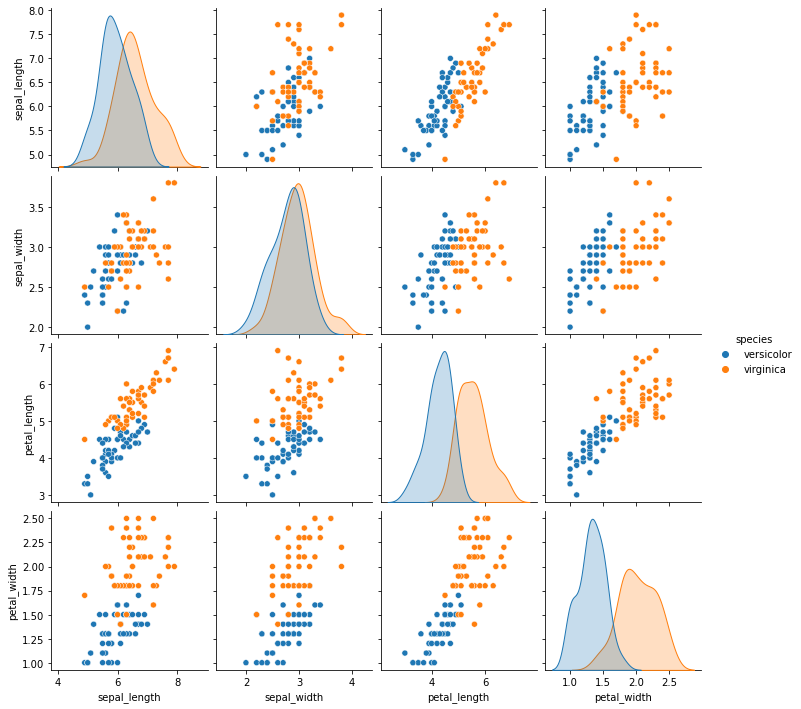

In [117]:
# exam13) 꽃잎의 길이(petal_length)에 의해 품종을 분류해보자
# 품종(species) 당 꽃받침 조각(sepal_length)과 꽃잎의 길이(petal_length) 및 너비 값과 품종의 관계를 알 수 있다.
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

iris_df = sns.load_dataset('iris')  # 데이터셋 로드
iris_df = iris_df[(iris_df['species'] == 'versicolor') | (iris_df['species'] == 'virginica')]
iris_df.head()

sns.pairplot(iris_df, hue='species')

In [121]:
# 꽃잎의 길이를 사용해서 품종을 분류해보자. 로지스틱 회귀 모델을 사용하자
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = iris_df[['petal_length']]  # 설명 변수 = 꽃잎의 길이

# versicolor 클래스 0, virginica를 클래스 1로
Y = iris_df['species'].map({'versicolor':0, 'virginica':1})

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

lr = LogisticRegression()  # 로지스틱 회귀 모델의 인스턴스를 생성
lr.fit(X_train, Y_train)  # 학습

print('coefficient =', lr.coef_)  # 계수
print('intercept =', lr.intercept_)  # 절편

# LogisticRegression(penalty, C)
# penalty = L1 정규화는 설명변수의 가중치가 0
#           L2 정규화는 설명변수의 가중치가 커지는 것을 방지하도록 과도한 학습은 방지하자라는 뜻
# C = 정규화 강도를 지정하는 파라미터(1.0)

coefficient = [[3.43226939]]
intercept = [-16.54483764]


In [122]:
from sklearn.metrics import *
Y_pred = lr.predict(X_test)
print(Y_pred)

# confusion matrix : 실제 클래스가 0,1의 데이터에 대한 클래스 0,1로 분류된 데이터의 개수를 요소로 리턴하는 행렬
print('confusion matrix =', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy =', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision =', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall =', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score =', f1_score(y_true=Y_test, y_pred=Y_pred))

[0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]
confusion matrix = [[ 7  3]
 [ 0 10]]
accuracy = 0.85
precision = 0.7692307692307693
recall = 1.0
f1 score = 0.8695652173913044


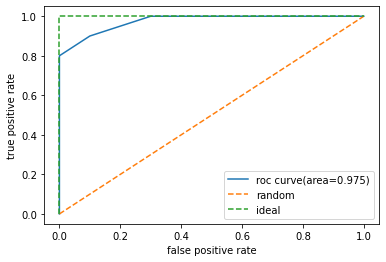

In [123]:
from sklearn.metrics import roc_curve, auc

Y_score = lr.predict_proba(X_test)[:,1]

# roc_curve : 곡선의 아래 면적으로 값이 클수록 분류 성분이 좋다
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=Y_score)
# 가로(FPR), 세로(TPR)

plt.plot(fpr, tpr, label='roc curve(area=%0.3f)'% auc(fpr, tpr))
plt.plot([0,1], [0,1], linestyle='--', label='random')
plt.plot([0,0,1], [0,1,1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

print('auc =', roc_auc_score(y_true=Y_test, y_score=Y_score))
# auc는 클래스 1의 데이터에 대한 점수가 가장 큰 예측률이 되고 실제로 0에 대한 데이터의 점수는 낮게 예측된다.

In [ ]:
# 로지스틱
1. 데이터가 어떤 데이터에 속하는지 예측, 분류(고객이 상품을 사거나 사지 않을 경우의 유무)
2. 주목하고 있는 사건이 발생할 확률을 예측(고객이 몇 %의 확률로 상품을 구매할 지 예측)

In [37]:
# 타이타닉 데이터로 로지스틱을 이용해서 분류해보자
# 2개 train의 데이터로 X, y
#     test라는 데이터로 테스트
#     로지스틱으로 분석한 후 roc_auc_score 점수 확인 <<시각화>>
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing  # 정규화
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import *

# train
# 데이터 로드
df_csv = pd.read_csv('train.csv', encoding='euc-kr')
df = pd.DataFrame(df_csv)

# NaN값 제거
rdf = df.drop(['PassengerId', 'Cabin','Name','Ticket'], axis=1)
rdf['Age'].fillna(df['Age'].median(), inplace=True)

most_freg = rdf['Embarked'].value_counts().idxmax()  # embarked 컬럼의 데이터를 개수로 나타내 가장 큰 값으로 출력
rdf['Embarked'].fillna(most_freg, inplace=True)

# 더미 파일 생성 및 기존 벡터 삭제
ndf = rdf[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
gender = pd.get_dummies(ndf['Sex'])
ndf = pd.concat([ndf, gender], axis=1)

embarked = pd.get_dummies(ndf['Embarked'],prefix='town')
ndf = pd.concat([ndf, embarked], axis=1)

ndf.drop(['Sex', 'Embarked'], axis=1, inplace=True)

# 정규화
X_train = ndf[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'town_C', 'town_Q', 'town_S']]  # 독립변수
y_train = ndf['Survived']   # 종속변수

# 독립변수 정규화
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)

In [38]:
# test
# 데이터 로드
df_test_csv = pd.read_csv('test.csv', encoding='euc-kr')
df_test = pd.DataFrame(df_test_csv)

df_suv_csv = pd.read_csv('gender_submission.csv', encoding='euc-kr')
df_suv = pd.DataFrame(df_suv_csv)

# test 파일 NaN 값 전처리
rdf_test = df_test.drop(['PassengerId', 'Cabin','Name','Ticket'], axis=1)

rdf_test['Age'].fillna(rdf_test['Age'].median(), inplace=True)
rdf_test['Fare'].fillna(rdf_test['Fare'].median(), inplace=True)

most_freg2 = rdf_test['Embarked'].value_counts().idxmax()
rdf_test['Embarked'].fillna(most_freg2, inplace=True)

# 더미 파일 생성 및 기존 벡터 삭제
ndf_test = rdf_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

gender2 = pd.get_dummies(ndf_test['Sex'])
ndf_test = pd.concat([ndf_test, gender2], axis=1)

embarked2 = pd.get_dummies(ndf_test['Embarked'],prefix='town')
ndf_test = pd.concat([ndf_test, embarked2], axis=1)
ndf_test.drop(['Sex', 'Embarked'], axis=1, inplace=True)

X_test = ndf_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'town_C', 'town_Q', 'town_S']]  # 독립변수
y_test = df_suv['Survived']   # 종속변수

# 정규화
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

# 모델링
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 예측 결과
test_pred = model.predict(X_test)
print('coefficient :', model.coef_)  #계수
print('intercept :', model.intercept_)  #절편
print('confusion matrix :', confusion_matrix(y_true=y_test, y_pred=test_pred))
print('accuracy :', accuracy_score(y_true=y_test, y_pred=test_pred))
print('precision :', precision_score(y_true=y_test, y_pred=test_pred))
print('recall :', recall_score(y_true=y_test, y_pred=test_pred))
print('f1 score :', f1_score(y_true=y_test, y_pred=test_pred))
y_score = model.predict_proba(X_test)[:,1]
print('auc :', roc_auc_score(y_true=y_test, y_score=y_score))

coefficient : [[-0.90406747 -0.49794772 -0.35178156 -0.07287647  0.10273368  0.64721891
  -0.64721891  0.07854136  0.03722713 -0.09223252]]
intercept : [-0.64559888]
confusion matrix : [[254  12]
 [ 14 138]]
accuracy : 0.937799043062201
precision : 0.92
recall : 0.9078947368421053
f1 score : 0.913907284768212
auc : 0.9794469726948952
